In [1]:
from __future__ import absolute_import, print_function

# --- System ---
import os
import sys
import warnings

# --- Utility ---
import pandas as pd
import numpy as np
import math
import random
import logging
import pickle
import warnings
import datetime, time
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

# --- Plot --
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# --- Pytorch ---
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import torch.backends.cudnn as cudnn

from torch.utils.data import Dataset, DataLoader, TensorDataset
from tqdm import tqdm
from datetime import datetime
from torch.utils.data import random_split

def seed_everything(seed=42):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

seed_everything()

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
root_dir = os.getcwd()

In [2]:
dataPath = "data/statistics-3.csv"
df = pd.read_csv(dataPath)
# columnList = df.columns

# Dropping columns that are not required at the moment
df = df.drop(columns=[ 'Unnamed: 0', 'UUID', 'HOSTNAME', 'ALIAS',
                       'THROUGHPUT (Receiver)', 'LATENCY (min.)', 'LATENCY (max.)', 
                       'CONGESTION (Receiver)', 'BYTES (Receiver)'
                     ])

# Pre-processing
pacing = df['PACING'].values
for i, p in enumerate(pacing):
    v, _ = p.split("gbit")
    pacing[i] = int(v)

df['PACING'] = pacing
df['CONGESTION (Sender)'] = (df['CONGESTION (Sender)'] == 'cubic').astype(int) # Cubic = 1 & BBRV2 = 0

In [4]:
unixtime = []
for i in range( len(df['TIMESTAMP']) ):
    unixtime.append(datetime.strptime(df['TIMESTAMP'][i], '%Y-%m-%dT%H:%M:%S.%fZ').timestamp())

df['UNIX'] = unixtime
df.head(5)

,TIMESTAMP,STREAMS,PACING,THROUGHPUT (Sender),LATENCY (mean),RETRANSMITS,CONGESTION (Sender),UNIX
0,2021-06-28T18:53:00.826Z,1,1,1.630381e+09,30185.5,1535,1,1.624921e+09
1,2021-06-28T18:54:13.558Z,1,1,1.659032e+09,30193.0,1344,1,1.624921e+09
2,2021-06-28T20:30:47.452Z,1,1,9.887439e+08,31422.5,0,1,1.624927e+09
3,2021-06-28T20:32:00.530Z,1,2,1.976052e+09,31420.5,0,1,1.624927e+09
4,2021-06-28T20:33:13.592Z,1,3,2.962443e+09,31489.0,0,1,1.624927e+09


In [5]:
# sorted_df = df.sort_values(by='UNIX')
# df = sorted_df

In [22]:
# a = len(df['THROUGHPUT (Sender)'])
# throughput_s1_cubic = df['THROUGHPUT (Sender)'][df['STREAMS']==1][df['CONGESTION (Sender)']]
# throughput_s4_cubic = df['THROUGHPUT (Sender)'][df['STREAMS']==4][df['CONGESTION (Sender)']]

# =========
# PACING 1
# =========
p=1
throughput_s1_cubic_p1 = df.loc[ (df['STREAMS']==1) & (df['CONGESTION (Sender)']==1) & (df['PACING']==p) ]
throughput_s4_cubic_p1 = df.loc[ (df['STREAMS']==4) & (df['CONGESTION (Sender)']==1) & (df['PACING']==p) ]

throughput_s1_bbrv2_p1 = df.loc[ (df['STREAMS']==1) & (df['CONGESTION (Sender)']==0) & (df['PACING']==p) ]
throughput_s4_bbrv2_p1 = df.loc[ (df['STREAMS']==4) & (df['CONGESTION (Sender)']==0) & (df['PACING']==p) ]

# =========
# PACING 2
# =========
p=2
throughput_s1_cubic_p2 = df.loc[ (df['STREAMS']==1) & (df['CONGESTION (Sender)']==1) & (df['PACING']==p) ]
throughput_s4_cubic_p2 = df.loc[ (df['STREAMS']==4) & (df['CONGESTION (Sender)']==1) & (df['PACING']==p) ]

throughput_s1_bbrv2_p2 = df.loc[ (df['STREAMS']==1) & (df['CONGESTION (Sender)']==0) & (df['PACING']==p) ]
throughput_s4_bbrv2_p2 = df.loc[ (df['STREAMS']==4) & (df['CONGESTION (Sender)']==0) & (df['PACING']==p) ]

# =========
# PACING 3
# =========
p=3
throughput_s1_cubic_p3 = df.loc[ (df['STREAMS']==1) & (df['CONGESTION (Sender)']==1) & (df['PACING']==p) ]
throughput_s4_cubic_p3 = df.loc[ (df['STREAMS']==4) & (df['CONGESTION (Sender)']==1) & (df['PACING']==p) ]

throughput_s1_bbrv2_p3 = df.loc[ (df['STREAMS']==1) & (df['CONGESTION (Sender)']==0) & (df['PACING']==p) ]
throughput_s4_bbrv2_p3 = df.loc[ (df['STREAMS']==4) & (df['CONGESTION (Sender)']==0) & (df['PACING']==p) ]


# =========
# PACING 4
# =========
p=4
throughput_s1_cubic_p4 = df.loc[ (df['STREAMS']==1) & (df['CONGESTION (Sender)']==1) & (df['PACING']==p) ]
throughput_s4_cubic_p4 = df.loc[ (df['STREAMS']==4) & (df['CONGESTION (Sender)']==1) & (df['PACING']==p) ]

throughput_s1_bbrv2_p4 = df.loc[ (df['STREAMS']==1) & (df['CONGESTION (Sender)']==0) & (df['PACING']==p) ]
throughput_s4_bbrv2_p4 = df.loc[ (df['STREAMS']==4) & (df['CONGESTION (Sender)']==0) & (df['PACING']==p) ]


# =========
# PACING 5
# =========
p=5
throughput_s1_cubic_p5 = df.loc[ (df['STREAMS']==1) & (df['CONGESTION (Sender)']==1) & (df['PACING']==p) ]
throughput_s4_cubic_p5 = df.loc[ (df['STREAMS']==4) & (df['CONGESTION (Sender)']==1) & (df['PACING']==p) ]

throughput_s1_bbrv2_p5 = df.loc[ (df['STREAMS']==1) & (df['CONGESTION (Sender)']==0) & (df['PACING']==p) ]
throughput_s4_bbrv2_p5 = df.loc[ (df['STREAMS']==4) & (df['CONGESTION (Sender)']==0) & (df['PACING']==p) ]


# =========
# PACING 6
# =========
p=6
throughput_s1_cubic_p6 = df.loc[ (df['STREAMS']==1) & (df['CONGESTION (Sender)']==1) & (df['PACING']==p) ]
throughput_s4_cubic_p6 = df.loc[ (df['STREAMS']==4) & (df['CONGESTION (Sender)']==1) & (df['PACING']==p) ]

throughput_s1_bbrv2_p6 = df.loc[ (df['STREAMS']==1) & (df['CONGESTION (Sender)']==0) & (df['PACING']==p) ]
throughput_s4_bbrv2_p6 = df.loc[ (df['STREAMS']==4) & (df['CONGESTION (Sender)']==0) & (df['PACING']==p) ]

# =========
# PACING 7
# =========
p=7
throughput_s1_cubic_p7 = df.loc[ (df['STREAMS']==1) & (df['CONGESTION (Sender)']==1) & (df['PACING']==p) ]
throughput_s4_cubic_p7 = df.loc[ (df['STREAMS']==4) & (df['CONGESTION (Sender)']==1) & (df['PACING']==p) ]

throughput_s1_bbrv2_p7 = df.loc[ (df['STREAMS']==1) & (df['CONGESTION (Sender)']==0) & (df['PACING']==p) ]
throughput_s4_bbrv2_p7 = df.loc[ (df['STREAMS']==4) & (df['CONGESTION (Sender)']==0) & (df['PACING']==p) ]


# =========
# PACING 8
# =========
p=8
throughput_s1_cubic_p8 = df.loc[ (df['STREAMS']==1) & (df['CONGESTION (Sender)']==1) & (df['PACING']==p) ]
throughput_s4_cubic_p8 = df.loc[ (df['STREAMS']==4) & (df['CONGESTION (Sender)']==1) & (df['PACING']==p) ]

throughput_s1_bbrv2_p8 = df.loc[ (df['STREAMS']==1) & (df['CONGESTION (Sender)']==0) & (df['PACING']==p) ]
throughput_s4_bbrv2_p8 = df.loc[ (df['STREAMS']==4) & (df['CONGESTION (Sender)']==0) & (df['PACING']==p) ]

# =========
# PACING 9
# =========
p=9
throughput_s1_cubic_p9 = df.loc[ (df['STREAMS']==1) & (df['CONGESTION (Sender)']==1) & (df['PACING']==p) ]
throughput_s4_cubic_p9 = df.loc[ (df['STREAMS']==4) & (df['CONGESTION (Sender)']==1) & (df['PACING']==p) ]

throughput_s1_bbrv2_p9 = df.loc[ (df['STREAMS']==1) & (df['CONGESTION (Sender)']==0) & (df['PACING']==p) ]
throughput_s4_bbrv2_p9 = df.loc[ (df['STREAMS']==4) & (df['CONGESTION (Sender)']==0) & (df['PACING']==p) ]

# =========
# PACING 10
# =========
p=10
throughput_s1_cubic_p10 = df.loc[ (df['STREAMS']==1) & (df['CONGESTION (Sender)']==1) & (df['PACING']==p) ]
throughput_s4_cubic_p10 = df.loc[ (df['STREAMS']==4) & (df['CONGESTION (Sender)']==1) & (df['PACING']==p) ]

throughput_s1_bbrv2_p10 = df.loc[ (df['STREAMS']==1) & (df['CONGESTION (Sender)']==0) & (df['PACING']==p) ]
throughput_s4_bbrv2_p10 = df.loc[ (df['STREAMS']==4) & (df['CONGESTION (Sender)']==0) & (df['PACING']==p) ]


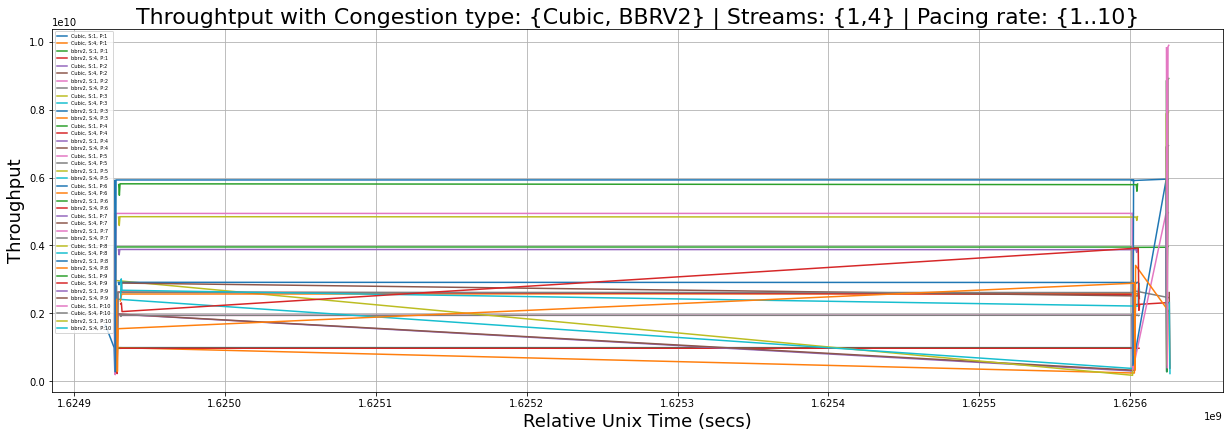

In [26]:
plt.figure(figsize = (18,7))

plt.plot(throughput_s1_cubic_p1['UNIX'], throughput_s1_cubic_p1['THROUGHPUT (Sender)'], label="Cubic, S:1, P:1")#, linestyle='-')
plt.plot(throughput_s4_cubic_p1['UNIX'], throughput_s4_cubic_p1['THROUGHPUT (Sender)'], label="Cubic, S:4, P:1")#, linestyle='-')
plt.plot(throughput_s1_bbrv2_p1['UNIX'], throughput_s1_bbrv2_p1['THROUGHPUT (Sender)'], label="bbrv2, S:1, P:1")#, linestyle='-')
plt.plot(throughput_s4_bbrv2_p1['UNIX'], throughput_s4_bbrv2_p1['THROUGHPUT (Sender)'], label="bbrv2, S:4, P:1")#, linestyle='-')

plt.plot(throughput_s1_cubic_p2['UNIX'], throughput_s1_cubic_p2['THROUGHPUT (Sender)'], label="Cubic, S:1, P:2")
plt.plot(throughput_s4_cubic_p2['UNIX'], throughput_s4_cubic_p2['THROUGHPUT (Sender)'], label="Cubic, S:4, P:2")
plt.plot(throughput_s1_bbrv2_p2['UNIX'], throughput_s1_bbrv2_p2['THROUGHPUT (Sender)'], label="bbrv2, S:1, P:2")
plt.plot(throughput_s4_bbrv2_p2['UNIX'], throughput_s4_bbrv2_p2['THROUGHPUT (Sender)'], label="bbrv2, S:4, P:2")

plt.plot(throughput_s1_cubic_p3['UNIX'], throughput_s1_cubic_p3['THROUGHPUT (Sender)'], label="Cubic, S:1, P:3")
plt.plot(throughput_s4_cubic_p3['UNIX'], throughput_s4_cubic_p3['THROUGHPUT (Sender)'], label="Cubic, S:4, P:3")
plt.plot(throughput_s1_bbrv2_p3['UNIX'], throughput_s1_bbrv2_p3['THROUGHPUT (Sender)'], label="bbrv2, S:1, P:3")
plt.plot(throughput_s4_bbrv2_p3['UNIX'], throughput_s4_bbrv2_p3['THROUGHPUT (Sender)'], label="bbrv2, S:4, P:3")

plt.plot(throughput_s1_cubic_p4['UNIX'], throughput_s1_cubic_p4['THROUGHPUT (Sender)'], label="Cubic, S:1, P:4")
plt.plot(throughput_s4_cubic_p4['UNIX'], throughput_s4_cubic_p4['THROUGHPUT (Sender)'], label="Cubic, S:4, P:4")
plt.plot(throughput_s1_bbrv2_p4['UNIX'], throughput_s1_bbrv2_p4['THROUGHPUT (Sender)'], label="bbrv2, S:1, P:4")
plt.plot(throughput_s4_bbrv2_p4['UNIX'], throughput_s4_bbrv2_p4['THROUGHPUT (Sender)'], label="bbrv2, S:4, P:4")

plt.plot(throughput_s1_cubic_p5['UNIX'], throughput_s1_cubic_p5['THROUGHPUT (Sender)'], label="Cubic, S:1, P:5")
plt.plot(throughput_s4_cubic_p5['UNIX'], throughput_s4_cubic_p5['THROUGHPUT (Sender)'], label="Cubic, S:4, P:5")
plt.plot(throughput_s1_bbrv2_p5['UNIX'], throughput_s1_bbrv2_p5['THROUGHPUT (Sender)'], label="bbrv2, S:1, P:5")
plt.plot(throughput_s4_bbrv2_p5['UNIX'], throughput_s4_bbrv2_p5['THROUGHPUT (Sender)'], label="bbrv2, S:4, P:5")

plt.plot(throughput_s1_cubic_p6['UNIX'], throughput_s1_cubic_p6['THROUGHPUT (Sender)'], label="Cubic, S:1, P:6")
plt.plot(throughput_s4_cubic_p6['UNIX'], throughput_s4_cubic_p6['THROUGHPUT (Sender)'], label="Cubic, S:4, P:6")
plt.plot(throughput_s1_bbrv2_p6['UNIX'], throughput_s1_bbrv2_p6['THROUGHPUT (Sender)'], label="bbrv2, S:1, P:6")
plt.plot(throughput_s4_bbrv2_p6['UNIX'], throughput_s4_bbrv2_p6['THROUGHPUT (Sender)'], label="bbrv2, S:4, P:6")

plt.plot(throughput_s1_cubic_p7['UNIX'], throughput_s1_cubic_p7['THROUGHPUT (Sender)'], label="Cubic, S:1, P:7")
plt.plot(throughput_s4_cubic_p7['UNIX'], throughput_s4_cubic_p7['THROUGHPUT (Sender)'], label="Cubic, S:4, P:7")
plt.plot(throughput_s1_bbrv2_p7['UNIX'], throughput_s1_bbrv2_p7['THROUGHPUT (Sender)'], label="bbrv2, S:1, P:7")
plt.plot(throughput_s4_bbrv2_p7['UNIX'], throughput_s4_bbrv2_p7['THROUGHPUT (Sender)'], label="bbrv2, S:4, P:7")

plt.plot(throughput_s1_cubic_p8['UNIX'], throughput_s1_cubic_p8['THROUGHPUT (Sender)'], label="Cubic, S:1, P:8")
plt.plot(throughput_s4_cubic_p8['UNIX'], throughput_s4_cubic_p8['THROUGHPUT (Sender)'], label="Cubic, S:4, P:8")
plt.plot(throughput_s1_bbrv2_p8['UNIX'], throughput_s1_bbrv2_p8['THROUGHPUT (Sender)'], label="bbrv2, S:1, P:8")
plt.plot(throughput_s4_bbrv2_p8['UNIX'], throughput_s4_bbrv2_p8['THROUGHPUT (Sender)'], label="bbrv2, S:4, P:8")

plt.plot(throughput_s1_cubic_p9['UNIX'], throughput_s1_cubic_p9['THROUGHPUT (Sender)'], label="Cubic, S:1, P:9")
plt.plot(throughput_s4_cubic_p9['UNIX'], throughput_s4_cubic_p9['THROUGHPUT (Sender)'], label="Cubic, S:4, P:9")
plt.plot(throughput_s1_bbrv2_p9['UNIX'], throughput_s1_bbrv2_p9['THROUGHPUT (Sender)'], label="bbrv2, S:1, P:9")
plt.plot(throughput_s4_bbrv2_p9['UNIX'], throughput_s4_bbrv2_p9['THROUGHPUT (Sender)'], label="bbrv2, S:4, P:9")

plt.plot(throughput_s1_cubic_p10['UNIX'], throughput_s1_cubic_p10['THROUGHPUT (Sender)'], label="Cubic, S:1, P:10")
plt.plot(throughput_s4_cubic_p10['UNIX'], throughput_s4_cubic_p10['THROUGHPUT (Sender)'], label="Cubic, S:4, P:10")
plt.plot(throughput_s1_bbrv2_p10['UNIX'], throughput_s1_bbrv2_p10['THROUGHPUT (Sender)'], label="bbrv2, S:1, P:10")
plt.plot(throughput_s4_bbrv2_p10['UNIX'], throughput_s4_bbrv2_p10['THROUGHPUT (Sender)'], label="bbrv2, S:4, P:10")

plt.title("Throughtput with Congestion type: {Cubic, BBRV2} | Streams: {1,4} | Pacing rate: {1..10}", fontsize=22)
plt.xlabel('Relative Unix Time (secs)', fontsize=18)
plt.ylabel('Throughput',fontsize=18) 

plt.legend(fontsize=5)
plt.grid(True)

# SPACE B/W PLOTS
plt.tight_layout(4)

# SAVE FIG
# plt.savefig("plots/throughput-cubic-p1.png", dpi=150)

plt.show()